In [1]:
!pip install kagglehub 

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("solarmainframe/ids-intrusion-csv")

print("Path to dataset files:", path)

c:\Users\ixiat\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 1.60G/1.60G [02:56<00:00, 9.75MB/s]

Extracting files...


Path to dataset files: C:\Users\ixiat\.cache\kagglehub\datasets\solarmainframe\ids-intrusion-csv\versions\1


In [1]:
import os
import pandas as pd

path = r"C:\Users\ixiat\.cache\kagglehub\datasets\solarmainframe\ids-intrusion-csv\versions\1"

datasets = os.listdir(path)

dfs = {}

for idx, file in enumerate(datasets, start=1):
    if file.endswith(".csv"):  # important safety check
        full_path = os.path.join(path, file)
        dfs[f"df{idx}"] = pd.read_csv(full_path)


C:\Users\ixiat\AppData\Local\Temp\ipykernel_26184\3630658251.py:13: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[f"df{idx}"] = pd.read_csv(full_path)
C:\Users\ixiat\AppData\Local\Temp\ipykernel_26184\3630658251.py:13: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[f"df{idx}"] = pd.read_csv(full_path)
C:\Users\ixiat\AppData\Local\Temp\ipykernel_26184\3630658251.py:13: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17

In [2]:
dfs['df1'].sample()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
952269,80,6,14/02/2018 08:46:49,86,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_datasets(dfs, label_col):

    total_label_dist = pd.Series(dtype=float)

    total_rows = 0
    total_cells = 0
    total_nulls = 0
    total_duplicates = 0

    for name, df in dfs.items():
        print("=" * 70)
        print(f"Dataset: {name}")
        
        if label_col in df.columns:
            df = df[df[label_col] != label_col]

        rows, cols = df.shape
        print(f"Shape: {df.shape}")

        nulls = df.isnull().sum().sum()
        print(f"Total null values: {nulls}")

        duplicates = df.duplicated().sum()
        print(f"Duplicate rows: {duplicates}")

        label_dist = df[label_col].value_counts()
        print("\nLabel distribution:")
        print(label_dist)

        total_label_dist = total_label_dist.add(label_dist)
        total_rows += rows
        total_cells += rows * cols
        total_nulls += nulls
        total_duplicates += duplicates

    # ---------------- gloabl statictis ----------------
    print("=" * 70)
    print("GLOBAL DATASET STATISTICS (ALL DATASETS COMBINED)")

    null_percentage = (total_nulls / total_cells) * 100 if total_cells > 0 else 0
    duplicate_percentage = (total_duplicates / total_rows) * 100 if total_rows > 0 else 0

    print(f"total rows: {total_rows}")

    print(f"\ntotal null values: {total_nulls}")
    print(f"null percentage: {null_percentage:.4f}%")

    print(f"\ntotal duplicated rows: {total_duplicates}")
    print(f"duplicate percentage: {duplicate_percentage:.2f}%")

    # ---------------- label dist ----------------
    print("=" * 70)
    print("Combined label distribution (counts):")
    total_label_dist = total_label_dist.astype(int)
    print(total_label_dist)

    percentages = (total_label_dist / total_label_dist.sum()) * 100

    # ---------------- bar  plot ----------------
    plt.figure()
    percentages.sort_values(ascending=False).plot(kind="bar")
    plt.ylabel("Percentage (%)")
    plt.title("Label Distribution Across All Datasets")
    plt.tight_layout()
    plt.show()
    x ={
        "label_counts": total_label_dist,
        "label_percentages": percentages,
        "total_nulls": total_nulls,
        "null_percentage": null_percentage,
        "total_duplicates": total_duplicates,
        "duplicate_percentage": duplicate_percentage
    }




Dataset: df1
Shape: (1048575, 80)
Total null values: 2277
Duplicate rows: 225628

Label distribution:
Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64
Dataset: df2
Shape: (1048575, 80)
Total null values: 4921
Duplicate rows: 2421

Label distribution:
Label
Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: count, dtype: int64
Dataset: df3
Shape: (1048574, 80)
Total null values: 0
Duplicate rows: 145847

Label distribution:
Label
DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Name: count, dtype: int64
Dataset: df4
Shape: (7948748, 84)
Total null values: 36767
Duplicate rows: 2

Label distribution:
Label
Benign                    7372557
DDoS attacks-LOIC-HTTP     576191
Name: count, dtype: int64
Dataset: df5
Shape: (1048575, 80)
Total null values: 0
Duplicate rows: 17557

Label distribution:
Label
DDOS attack-HOIC        6

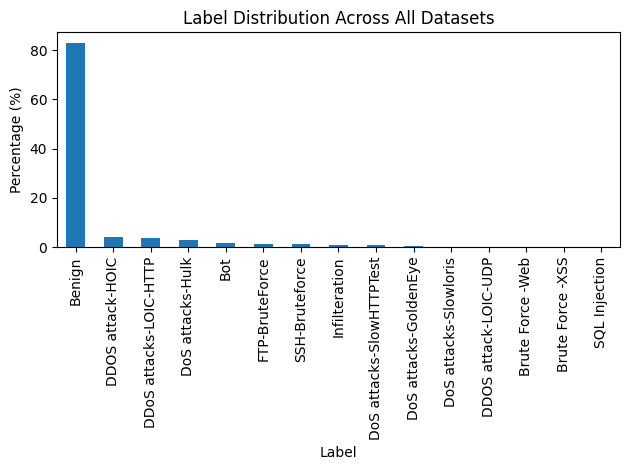

In [9]:
label_column = "Label"
analyze_datasets(dfs, label_col=label_column)


In [4]:
reference_cols = set(dfs["df1"].columns)
df4_cols = set(dfs["df4"].columns)
extra_columns = df4_cols - reference_cols

print(f"Extra columns in df4 ({len(extra_columns)}):")
for col in sorted(extra_columns):
    print(col)


Extra columns in df4 (4):
Dst IP
Flow ID
Src IP
Src Port


In [5]:
import pandas as pd
import numpy as np

def clean_and_optimize_ids(
    df,
    label_col="Label",
    drop_id_columns=True
):
    df = df.copy()

    if drop_id_columns:
        id_cols = [
            "Flow ID", "Src IP", "Dst IP",
            "Src Port", "Dst Port", "Timestamp"
        ]
        df.drop(columns=[c for c in id_cols if c in df.columns],
                errors="ignore", inplace=True)

    df = df[df[label_col] != label_col]   
    df.drop_duplicates(inplace=True)
    df.dropna(subset=[label_col], inplace=True)

    feature_cols = df.columns.drop(label_col)

    for col in feature_cols:
        df[col] = pd.to_numeric(
            df[col],
            errors="coerce",
            downcast="float"
        )

    df[feature_cols] = df[feature_cols].fillna(0)

    return df


In [ ]:

for name in dfs:
    dfs[name] = clean_and_optimize_ids(
        dfs[name],
        label_col="Label",
        drop_id_columns=True
    )


In [ ]:
import pandas as pd
import numpy as np

def analyze_numeric_columns(df, zero_threshold=0.96):


    results = []

    numeric_df = df.select_dtypes(include=[np.number])

    for col in numeric_df.columns:
        series = numeric_df[col].dropna()

        unique_vals = series.nunique()
        zero_count = (series == 0).sum()
        total_count = len(series)
        zero_ratio = zero_count / total_count if total_count > 0 else 0

        if unique_vals == 1:
            col_type = "constant"

        elif unique_vals == 2:
            col_type = "binary"

        elif zero_ratio >= zero_threshold:
            col_type = "mostly_zero"

        else:
            col_type = "normal_numeric"

        results.append({
            "column": col,
            "unique_values": unique_vals,
            "zero_percentage": round(zero_ratio * 100, 2),
            "classification": col_type
        })

    return pd.DataFrame(results)


In [ ]:
all_analyses = {}

for name, df in dfs.items():
    all_analyses[name] = analyze_numeric_columns(df)


In [ ]:
for name, analysis_df in all_analyses.items():
    print(name, analysis_df.columns.tolist())


df1 ['column', 'unique_values', 'zero_percentage', 'classification']
df2 ['column', 'unique_values', 'zero_percentage', 'classification']
df3 ['column', 'unique_values', 'zero_percentage', 'classification']
df4 ['column', 'unique_values', 'zero_percentage', 'classification']
df5 ['column', 'unique_values', 'zero_percentage', 'classification']
df6 ['column', 'unique_values', 'zero_percentage', 'classification']
df7 ['column', 'unique_values', 'zero_percentage', 'classification']
df8 ['column', 'unique_values', 'zero_percentage', 'classification']
df9 ['column', 'unique_values', 'zero_percentage', 'classification']
df10 ['column', 'unique_values', 'zero_percentage', 'classification']


In [ ]:
dfs['df8'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 477632 entries, 0 to 613102
Data columns (total 78 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Protocol           477632 non-null  float32
 1   Flow Duration      477632 non-null  float64
 2   Tot Fwd Pkts       477632 non-null  float32
 3   Tot Bwd Pkts       477632 non-null  float32
 4   TotLen Fwd Pkts    477632 non-null  float64
 5   TotLen Bwd Pkts    477632 non-null  float64
 6   Fwd Pkt Len Max    477632 non-null  float32
 7   Fwd Pkt Len Min    477632 non-null  float32
 8   Fwd Pkt Len Mean   477632 non-null  float32
 9   Fwd Pkt Len Std    477632 non-null  float32
 10  Bwd Pkt Len Max    477632 non-null  float32
 11  Bwd Pkt Len Min    477632 non-null  float32
 12  Bwd Pkt Len Mean   477632 non-null  float32
 13  Bwd Pkt Len Std    477632 non-null  float32
 14  Flow Byts/s        477632 non-null  float64
 15  Flow Pkts/s        477632 non-null  float64
 16  Flow IA

In [ ]:
all_analyses

{'df1':            column  unique_values  zero_percentage  classification
 0        Dst Port          18567             1.44  normal_numeric
 1        Protocol              3             1.44  normal_numeric
 2   Flow Duration         389493             0.46  normal_numeric
 3    Tot Fwd Pkts            751             0.00  normal_numeric
 4    Tot Bwd Pkts            988            17.83  normal_numeric
 ..            ...            ...              ...             ...
 73     Active Min          38864            90.89  normal_numeric
 74      Idle Mean          80419            89.69  normal_numeric
 75       Idle Std          57847            92.10  normal_numeric
 76       Idle Max          59134            89.69  normal_numeric
 77       Idle Min          69046            89.69  normal_numeric
 
 [78 rows x 4 columns],
 'df2':            column  unique_values  zero_percentage  classification
 0        Dst Port          21732             1.77  normal_numeric
 1        Protocol    

In [ ]:
import pandas as pd

def finalize_ids_datasets(
    dfs,
    all_analyses,
    label_col="Label"
):


    cols_to_drop = set()

    for analysis_df in all_analyses.values():
        drop_mask = analysis_df["classification"].isin(
            ["constant", "mostly_zero"]
        )
        cols = analysis_df.loc[drop_mask, "column"]
        cols_to_drop.update(cols)

    cols_to_drop = list(cols_to_drop)

    print(f"Columns to drop (constant or mostly zero): {len(cols_to_drop)}")
    print(cols_to_drop)

 
    for name in dfs:
        dfs[name] = dfs[name].drop(columns=cols_to_drop, errors="ignore")

    for name, df in dfs.items():
        df[label_col] = df[label_col].apply(
            lambda x: 1 if str(x).lower() == "benign" else 0
        )


    print("\n" + "=" * 70)
    print("CLASS DISTRIBUTION AFTER COLUMN DROPS")

    global_counts = pd.Series(dtype=int)

    for name, df in dfs.items():
        counts = df[label_col].value_counts()
        percentages = counts / counts.sum() * 100

        print(f"\n{name}")
        print("Counts:")
        print(counts)
        print("Percentages:")
        print(percentages.round(2))

        global_counts = global_counts.add(counts, fill_value=0)

    global_percentages = global_counts / global_counts.sum() * 100

    print("\n" + "=" * 70)
    print("GLOBAL CLASS DISTRIBUTION")
    print("Counts:")
    print(global_counts.astype(int))
    print("Percentages:")
    print(global_percentages.round(2))

    return dfs, {
        "dropped_columns": cols_to_drop,
        "global_class_counts": global_counts.astype(int),
        "global_class_percentages": global_percentages
    }


In [ ]:
dfs, summary = finalize_ids_datasets(
    dfs,
    all_analyses,
    label_col="Label"
)



Columns to drop (constant or mostly zero): 21
['Active Mean', 'Bwd PSH Flags', 'Bwd Byts/b Avg', 'Active Std', 'Active Max', 'Fwd URG Flags', 'Bwd Pkt Len Min', 'Idle Max', 'Bwd Pkts/b Avg', 'Idle Mean', 'Fwd Pkts/b Avg', 'Idle Std', 'Fwd Byts/b Avg', 'Active Min', 'Fwd Blk Rate Avg', 'Bwd URG Flags', 'Idle Min', 'Pkt Len Min', 'CWE Flag Count', 'Fwd Pkt Len Min', 'Bwd Blk Rate Avg']

CLASS DISTRIBUTION AFTER COLUMN DROPS

df1
Counts:
Label
1    525703
0     94102
Name: count, dtype: int64
Percentages:
Label
1    84.82
0    15.18
Name: count, dtype: float64

df2
Counts:
Label
1    744261
0     51314
Name: count, dtype: int64
Percentages:
Label
1    93.55
0     6.45
Name: count, dtype: float64

df3
Counts:
Label
1    446717
0    145554
Name: count, dtype: int64
Percentages:
Label
1    75.42
0    24.58
Name: count, dtype: float64

df4
Counts:
Label
1    4862083
0     575364
Name: count, dtype: int64
Percentages:
Label
1    89.42
0    10.58
Name: count, dtype: float64

df5
Counts:
Label
1

In [ ]:
for name in dfs:
    print(dfs[name].shape)


(619805, 57)
(795575, 57)
(592271, 57)
(5437447, 57)
(561396, 57)
(830888, 57)
(830100, 57)
(477632, 57)
(254789, 57)
(772163, 57)


In [2]:
import os
import pandas as pd

RANDOM_STATE = 42
TARGET_SIZE = 5000
OUTPUT_DIR = "Downsamplingfile"

# Create folder if it does not exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

for name, df in dfs.items():

    # Number of classes
    class_counts = df["Label"].value_counts()
    num_classes = class_counts.shape[0]

    # Samples per class
    samples_per_class = TARGET_SIZE // num_classes

    # Stratified downsampling
    df_down = (
        df.groupby("Label", group_keys=False)
          .apply(lambda x: x.sample(
              n=min(samples_per_class, len(x)),
              random_state=RANDOM_STATE
          ))
          .reset_index(drop=True)
    )

    # Fill if fewer than 5000 rows
    if len(df_down) < TARGET_SIZE:
        remaining = TARGET_SIZE - len(df_down)
        extra = df.drop(df_down.index, errors="ignore") \
                  .sample(remaining, random_state=RANDOM_STATE)
        df_down = pd.concat([df_down, extra], ignore_index=True)

    # Update dfs
    dfs[name] = df_down

    # Save to folder
    output_path = os.path.join(OUTPUT_DIR, f"{name}_downsampled.csv")
    df_down.to_csv(output_path, index=False)


C:\Users\ixiat\AppData\Local\Temp\ipykernel_26184\49050608.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(
C:\Users\ixiat\AppData\Local\Temp\ipykernel_26184\49050608.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(
C:\Users\ixiat\AppData\Local\Temp\ipykernel_26184\49050608.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_all = pd.concat(
    [df.drop(columns=["Label"]) for df in dfs.values()],
    axis=0
)

scaler.fit(X_all)

for name in dfs:
    feature_cols = dfs[name].columns.drop("Label")
    dfs[name][feature_cols] = scaler.transform(
        dfs[name][feature_cols]
    )


In [ ]:


import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

class FedLogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))



def make_dataloader(df, label_col="Label", batch_size=256):
    X = torch.tensor(
        df.drop(columns=[label_col]).values,
        dtype=torch.float32
    )
    y = torch.tensor(
        df[label_col].values,
        dtype=torch.float32
    )

    dataset = TensorDataset(X, y)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)


client_loaders = {
    name: make_dataloader(df)
    for name, df in dfs.items()
}



def train_local(model, dataloader, epochs=1, lr=0.01):
    model.train()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = nn.BCELoss()

    for _ in range(epochs):
        for X, y in dataloader:
            optimizer.zero_grad()
            preds = model(X).squeeze()
            loss = criterion(preds, y)
            loss.backward()
            optimizer.step()

    return model.state_dict()



def fed_avg(client_states):
    avg_state = {}

    for key in client_states[0]:
        avg_state[key] = torch.mean(
            torch.stack([state[key] for state in client_states]),
            dim=0
        )

    return avg_state



input_dim = dfs[list(dfs.keys())[0]].shape[1] - 1
global_model = FedLogisticRegression(input_dim)

ROUNDS = 10
LOCAL_EPOCHS = 1

for rnd in range(ROUNDS):
    print(f"\n--- Federated Round {rnd + 1} ---")

    client_states = []

    for name, loader in client_loaders.items():
        client_model = FedLogisticRegression(input_dim)
        client_model.load_state_dict(global_model.state_dict())

        updated_state = train_local(
            client_model,
            loader,
            epochs=LOCAL_EPOCHS
        )

        client_states.append(updated_state)

    global_model.load_state_dict(fed_avg(client_states))

print("\n Federated Logistic Regression complete")


In [3]:
!pip install pandas

   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.3 MB 699.0 kB/s eta 0:00:16
   - -------------------------------------- 0.5/11.3 MB 699.0 kB/s eta 0:00:16
   -- ------------------------------------- 0.8/11.3 MB 610.3 kB/s eta 0:00:18
   -- ------------------------------------- 0.8/11.3 MB 610.3 kB/s eta 0:00:18
   -- ------------------------------------- 0.8/11.3 MB 610.3 kB/s eta 0:00:18
   --- ------------------------------------ 1.0/11.3 MB 535.7 kB/s eta 0:00:20
   --- ------------------------------------ 1.0/11.3 MB 535.7 kB/s eta 0:00:20
   --- ------------------------------------ 1.0/11.3 MB 535.7 kB/s eta 0:00:20
   ---- ----------------------------------- 1.3/11.3 MB 482.8 kB/s eta 0:00:21
   ---- -

In [4]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
     ---------------------------------------- 0.0/536.2 kB ? eta -:--:--
     ---------------------------------------- 536.2/536.2 kB 2.9 MB/s  0:00:00
INFO: pip is looking at multiple versions of networkx to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/2.8 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 GB 10.1 MB/s eta 0:04:40
   ---------------------------------------- 0.0/2.8 GB 6.7 MB/s eta 0:06:59
   ---------------------------------------- 0.0/2.8 GB 5.9 MB/s eta 0:07:55
   ---------------------------------------- 0.0/2.8 GB 4.6 MB/s eta 0:10:06
   ---------------------------------------- 0.0/2.8 GB 4.3 MB/s eta 0:10:47
   ---------------------------------------- 0.0/2.8 GB 4.3 MB/s eta 0:10:54
   ---------------------------------------- 0.0/2.8 GB 3.9 MB/s eta 0:11:59
   ---------------------------------------

In [5]:
!pip install transformers


   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.0 MB 322.8 kB/s eta 0:00:36
   - -------------------------------------- 0.5/12.0 MB 322.8 kB/s eta 0:00:36
   - -------------------------------------- 0.5/12.0 MB 322.8 kB/s eta 0:00:36
   -- ------------------------------------- 0.8/12.0 MB 368.7 k

In [12]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -----------------------------

In [3]:
!python -m pip --version


pip 21.2.3 from c:\Users\ixiat\AppData\Local\Programs\Python\Python310\lib\site-packages\pip (python 3.10)



In [5]:
!python -m pip --version


pip 21.2.3 from c:\Users\ixiat\AppData\Local\Programs\Python\Python310\lib\site-packages\pip (python 3.10)



In [6]:
!python -m pip install --upgrade pip


  Attempting uninstall: pip
    Found existing installation: pip 21.2.3
    Uninstalling pip-21.2.3:
      Successfully uninstalled pip-21.2.3


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
!py -m pip --version


pip 25.3 from C:\Users\ixiat\AppData\Local\Programs\Python\Python310\lib\site-packages\pip (python 3.10)

